# Plot Connectomes

In [1]:
import nilearn.plotting as nip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/home/stocco/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
oldfont = plt.rcParams['font.sans-serif']
plt.rcParams['font.sans-serif'] = ['FreeSans']

## Load the Power 2011 classification

All of the connectomes in this analysis were extacted from the Power 2011 classification. We will start by first loading the corresponding data table.

In [3]:
power2011 = pd.read_csv("../rsfmri/bin/power_2011.csv")
power2011 = power2011.iloc[:,0:7]
power2011

ROI   X   Y   Z  Network  Color       NetworkName
0      1 -25 -98 -12       -1  White         Uncertain
1      2  27 -97 -13       -1  White         Uncertain
2      3  24  32 -18       -1  White         Uncertain
3      4 -56 -45 -24       -1  White         Uncertain
4      5   8  41 -24       -1  White         Uncertain
..   ...  ..  ..  ..      ...    ...               ...
259  260 -27 -71  37       12  Green  Dorsal attention
260  261 -32  -1  54       12  Green  Dorsal attention
261  262 -42 -60  -9       12  Green  Dorsal attention
262  263 -17 -59  64       12  Green  Dorsal attention
263  264  29  -5  54       12  Green  Dorsal attention

[264 rows x 7 columns]

### Visualize the Brain Parcellation

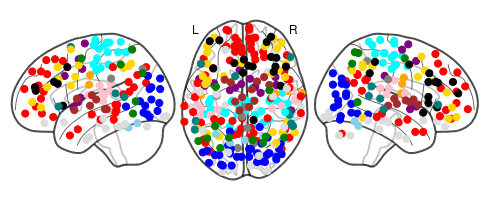

In [4]:
pc = np.zeros((264, 264))
pcol = [x.lower() for x in list(power2011['Color'])]

def colortranslate(x):
    if x.lower() == "yellow":
        return "gold"
    elif x.lower() == "pale blue":
        return "skyblue"
    elif x.lower() == "white":
        return "gainsboro"
    else:
        return x
    
pcol = [colortranslate(x) for x in pcol]
xyz = []
for roi in list(power2011['ROI']):
    entry = power2011.loc[power2011['ROI'] == roi]
    x = int(entry['X'])
    y = int(entry['Y'])
    z = int(entry['Z'])
    xyz.append((x,y,z))
pcoords = np.array(xyz)

img = nip.plot_connectome(pc, pcoords, node_color=pcol, display_mode='lzr')

<ipython-input-5-905d08688b59>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("figures/power2011.png", figsize=(8, 4), dpi=300)


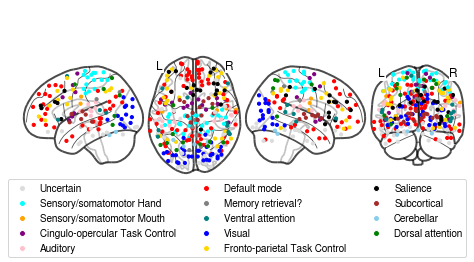

In [5]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
fig, axs = plt.subplots(1,1, figsize=(8,4))
nip.plot_connectome(pc, pcoords, node_color=pcol, display_mode='lzry', axes=axs, node_size=10)

allkols=list(power2011['Color'])
allnets=list(power2011['NetworkName'])

kols=[]
nets=[]
for i in range(len(allkols)):
    if not allkols[i] in kols:
        kols.append(allkols[i])
        nets.append(allnets[i])

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=6) for x in [colortranslate(x) for x in kols]]

fig.legend(handles, nets, loc="lower center", ncol=3)
plt.savefig("figures/power2011.png", figsize=(8, 4), dpi=300)
plt.show()

### Visualize the connectome matrix

We can visualize the connectome matrix for the 62 participants. First, we load the data:

In [6]:
R = np.zeros((264, 264, 61))
PR = np.zeros((264, 264, 61))

index = 0
for ii in range(1, 63):
    subj = "sub-%03d" % (ii,)
    if ii != 8:
        R[:,:,index]=np.loadtxt("../rsfmri/%s/R_py.txt" % (subj,))
        PR[:,:,index]=np.loadtxt("../rsfmri/%s/PR_py.txt" % (subj,))
        index += 1

Then, we visualize it as a matrix

<ipython-input-7-5a514c6b682c>:5: RuntimeWarning: divide by zero encountered in log
  mR = np.tanh(np.mean((np.log(1+R) - np.log(1-R))/2, 2))
<ipython-input-7-5a514c6b682c>:6: RuntimeWarning: divide by zero encountered in log
  mPR = np.tanh(np.mean((np.log(1+PR) - np.log(1-PR))/2, 2))


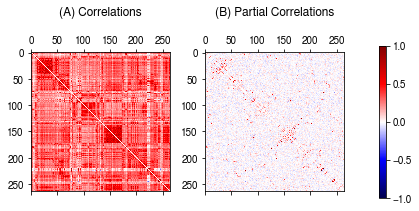

In [7]:

#mR = np.mean(R, 2)
#mPR = np.mean(PR, 2)

# Calculate mean r values using Fisher's Z transform
mR = np.tanh(np.mean((np.log(1+R) - np.log(1-R))/2, 2))
mPR = np.tanh(np.mean((np.log(1+PR) - np.log(1-PR))/2, 2))


for ii in range(264):
    mR[ii,ii] = 0
    mPR[ii,ii] = 0

fig, axs = plt.subplots(1, 3, figsize=(6, 3), gridspec_kw={'width_ratios': [20, 20, 1]})
im = axs[0].matshow(mR, vmin=-1, vmax=1, cmap="seismic")
axs[0].set_title("(A) Correlations\n")
fig.colorbar(im, cax=axs[2])
axs[1].matshow(mPR, vmin=-0.5, vmax=0.5, cmap="seismic")
axs[1].set_title("(B) Partial Correlations\n")
#axs[2].set_visible(False)
plt.tight_layout()
plt.savefig("figures/connectomes.png", dpi=300)

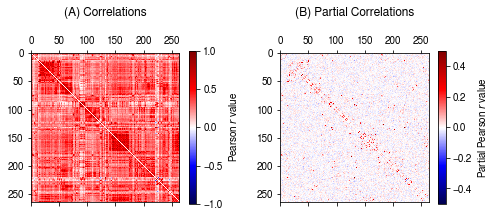

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))
im = axs[0].matshow(mR, vmin=-1, vmax=1, cmap="seismic")
axs[0].set_title("(A) Correlations\n")
cbar = axs[0].figure.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel(r"Pearson $r$ value", rotation=90, va="top")

im = axs[1].matshow(mPR, vmin=-0.5, vmax=0.5, cmap="seismic")
axs[1].set_title("(B) Partial Correlations\n")
cbar = axs[1].figure.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel(r"Partial Pearson $r$ value", rotation=90, va="top")

#axs[2].set_visible(False)
plt.tight_layout()
plt.savefig("figures/connectomes.png", dpi=300)


### Creating a generic function

Here we assemble all of the steps above into a single function.

In [9]:
### Create a Handy Function

def connectome_visualization(variable, name=None, blackbg=True):
    if name is None:
        name = variable
    # Load the data
    data = pd.read_csv("%s.csv" % (variable,))
    
    # Extract Regions
    ROIs = []

    for c in data['connection']:
        roi1, roi2 = c.split("-")

        if int(roi1) not in ROIs:
            ROIs.append(int(roi1))
        if int(roi2) not in ROIs:
            ROIs.append(int(roi2))
    ROIs.sort()

    # Extra ROI data
    sub = power2011[power2011['ROI'].isin( ROIs)]
    N = len(sub['ROI'])
    
    connectome = np.zeros((N, N))
    weighted_connectome = np.zeros((N, N))
    
    for c in range(N):
        for r in range(N):
            roi1 = ROIs[c]
            roi2 = ROIs[r]
            conn_name = "%d-%d" % (min(roi1, roi2), max(roi1, roi2))
            entry = data.loc[data['connection'] == conn_name]
            if len(entry) == 1:
                beta=float(entry['Beta'])
                connectome[c,r] = beta
                weighted_connectome[c,r] = beta * mPR[int(ROIs[c]-1), int(ROIs[r]-1)]
    
    plt.imshow(connectome)
    plt.title("Connectome (Beta values)")
    plt.show()

    xyz = []
    sub.loc[:,['X', 'Y', 'Z']]
    for roi in ROIs:
        entry = sub.loc[sub['ROI'] == roi]
        x = int(entry['X'])
        y = int(entry['Y'])
        z = int(entry['Z'])
        xyz.append((x,y,z))
    coords = np.array(xyz)

    colors = []
    sub.loc[:,['Color']]
    for roi in ROIs:
        entry = sub.loc[sub['ROI'] == roi]
        #col = entry['Color']
        col = entry.iloc[0,5]
        colors.append(col.lower())

    # Replace the stupid "pale blue"
    
    colors = [x if x != "pale blue" else "dodgerblue" for x in colors ]
    nip.plot_connectome(connectome, coords, colorbar=True,
                    title=r"Predictors of %s" % (name,), 
                    black_bg=blackbg, node_color=colors)
    plt.savefig("%s.png" % (variable,))
    nip.show()

    nip.plot_connectome_strength(connectome, coords,
                                 title=r"Importance of ROIs in %s" % (name,))
    plt.savefig("%s_importance.png" % (variable,))
    nip.show()
    
    return connectome, coords, colors, weighted_connectome

## Programming Accuracy $A_P$

We use the new function to plot a different variable, the Rate of Forgetting $\alpha$.

Now some prettier visualizations

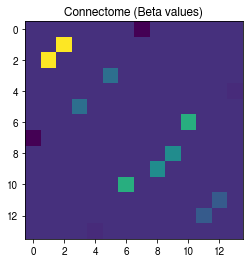

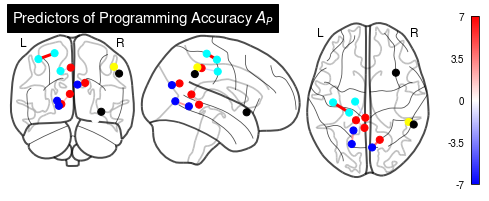

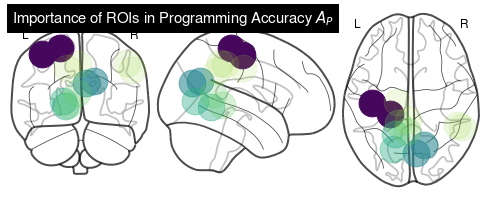

In [10]:
c, nc, cols, wc = connectome_visualization("chantel", name=r"Programming Accuracy $A_P$", blackbg=False)
nip.view_connectome(c, nc, colorbar_fontsize=8)

Some prettier visualizations. First, we need to get the network names and colors.

In [11]:
alpha = pd.read_csv("chantel.csv")
alpha

index network                                      network_names  \
0   8736     1-1  Sensory/somatomotor Hand-Sensory/somatomotor Hand   
1  23837     5-5                          Default mode-Default mode   
2  24566     1-5              Sensory/somatomotor Hand-Default mode   
3  42128     7-7                                      Visual-Visual   
4  42861     5-7                                Default mode-Visual   
5  53782     8-9              Fronto-parietal Task Control-Salience   
6  55525    -1-9                                 Uncertain-Salience   

  connection  censor      Beta  
0      24-34    True  7.049568  
1      77-91    True  1.853598  
2      14-94    True -1.144539  
3    152-160    True  2.854996  
4     93-163    True  3.986901  
5    190-204    True  1.220607  
6     85-211    True -0.138326

Then, we define the list of network names and corresponding colors

In [12]:
ROIs = []

FCvals = []
for conn in alpha['connection']:
    roi1, roi2 = conn.split("-")

    if int(roi1) not in ROIs:
        ROIs.append(int(roi1))
    if int(roi2) not in ROIs:
        ROIs.append(int(roi2))
        
    FCvals.append(mPR[int(roi1)-1, int(roi2)-1])
ROIs.sort()

pcol = [colortranslate(x) for x in pcol]

subset = pd.DataFrame(power2011[power2011['ROI'].isin(ROIs)])
print(subset.shape)
subset

(14, 7)


ROI   X   Y   Z  Network   Color                   NetworkName
13    14 -14 -18  40        1    Cyan      Sensory/somatomotor Hand
23    24 -40 -19  54        1    Cyan      Sensory/somatomotor Hand
33    34 -21 -31  61        1    Cyan      Sensory/somatomotor Hand
76    77 -13 -40   1        5     Red                  Default mode
84    85  27  16 -17       -1   White                     Uncertain
90    91  -3 -49  13        5     Red                  Default mode
92    93  15 -63  26        5     Red                  Default mode
93    94  -2 -37  44        5     Red                  Default mode
151  152 -18 -68   5        7    Blue                        Visual
159  160 -16 -52  -1        7    Blue                        Visual
162  163   6 -72  24        7    Blue                        Visual
189  190  49 -42  45        8  Yellow  Fronto-parietal Task Control
203  204  55 -45  37        9   Black                      Salience
210  211  34  16  -8        9   Black                      Salience

Now, we use the `subset` to create the list of network names and corresponding colors

In [13]:
allkols=list(subset['Color'])
allnets=list(subset['NetworkName'])

kols=[]
nets=[]
for i in range(len(allkols)):
    if not allkols[i] in kols:
        kols.append(allkols[i])
        nets.append(allnets[i])

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in [colortranslate(x) for x in kols]]

And now, we visualize that:

<ipython-input-14-c3de389e020c>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("figures/prog_acc_pretty.png", figsize=(10, 4.2), dpi=300)


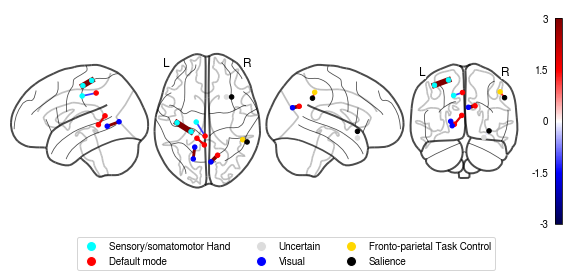

In [14]:
fig, axs = plt.subplots(1,1, figsize=(10, 4.2))

nip.plot_connectome(c, nc, [colortranslate(x) for x in cols], 
                    edge_cmap="seismic", 
                    #edge_cmap="viridis", 
                    axes=axs, node_size=20,
                    display_mode="lzry", colorbar=True, 
                    edge_vmax=3, edge_vmin=-3)

fig.legend(handles, nets, loc="lower center", ncol=3)
plt.savefig("figures/prog_acc_pretty.png", figsize=(10, 4.2), dpi=300)
plt.show()

In [15]:
np.max(c)

7.049568074918236

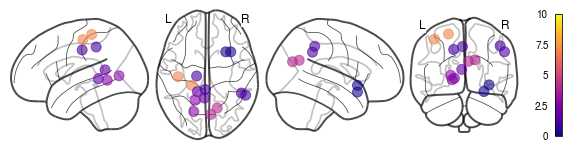

In [16]:
importance = np.sum(np.abs(c), axis=1)
fig, axs = plt.subplots(1,1, figsize=(10, 2.5))
nip.plot_markers(node_values=importance, node_coords=nc, alpha=0.6, 
                 axes=axs, display_mode="lzry", node_cmap="plasma", node_vmin=-0, node_vmax=10)
plt.savefig("figures/progr_acc_importance.png", dpi=300)
plt.show()

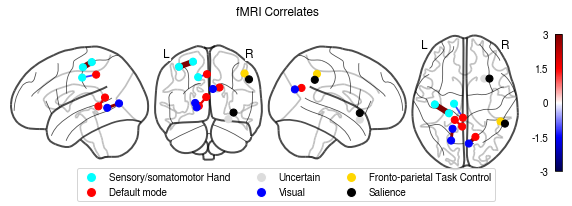

In [17]:
fig, axs = plt.subplots(1,1, figsize=(10, 2.8))

nip.plot_connectome(c, nc, [colortranslate(x) for x in cols], 
                    edge_cmap="seismic", axes=axs,
                    display_mode="lyrz", colorbar=True, 
                    edge_vmax=3, edge_vmin=-3)

fig.legend(handles, nets, loc="lower center", ncol=3)
fig.suptitle("fMRI Correlates")
plt.savefig("figures/prog_acc_imp.png", dpi=300)
plt.show()

## Personalized Connectome Strength

This follows ideas by Florian Sense.

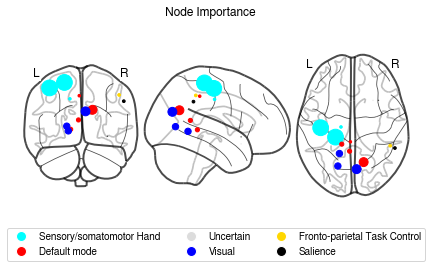

In [18]:
importance = np.sum(np.abs(c), axis=1)
size = np.power(importance, 2)
fig, axs = plt.subplots(2,1, figsize=(7, 4),
                       gridspec_kw={'height_ratios':(10,1)})

d = nip.plot_glass_brain(None, axes=axs[0], display_mode="ortho")
d.add_markers(nc, 
              marker_color=[colortranslate(x) for x in cols], 
              marker_size = 5*size)
axs[1].axis('off')
axs[1].legend(handles, nets, loc="center", ncol=3)
fig.suptitle("Node Importance")
plt.savefig("prog_acc.png", dpi=300)

In [19]:
importance

array([1.14453917, 7.04956807, 7.04956807, 1.85359771, 0.13832589,
       1.85359771, 3.98690118, 1.14453917, 2.85499555, 2.85499555,
       3.98690118, 1.22060694, 1.22060694, 0.13832589])

A better version of connectome strength